# Rapport - Séances TP Numérique sur serveur Tenibre 
## Méthodes numériques en turbulence. 

### Clément Barbet - Professeur :  G. Balarac

## Exo 1 - Introduction to the problem with some math.
- Considering a laminar permanent Kolmogorov flow, find velocity fields.
- Show that the characteristic Reynolds number can then be defined as:

$$ Re = \frac{u_* l_*}{\nu} = \frac{A^{1/2}}{k^{3/2}_f \nu}$$


## Résolution : 

- We want to establish a relationship for the velocity fields $u_i(x,t)$ that follow the Navier-Stokes equations, such that : 

$$ \partial_t u_i + u_j \partial_j u_i = - \partial_i p + \nu \Delta u_i + f_i$$

$$ \partial_i u_i = 0 $$  
with $ i= x, y, z \ $ cartesian coordinates for 3D flow.

$f_i$ is a forcing term which is defined in our simulations as 

$$ f_x = A \sin (k_f z) \text{  and  }  f_y = f_z = 0 $$

This is the description of a Kolmogorov flow. We can use these equations, and write them for averages over time and over the horizontal $y$ direction $<...>_{t,y}$. This results in the definition of the following variables : 

$$ U_i = <u_i>_{t,y}$$ 
$$ M_{ij} = <u_i u_j>_{t,y} - <u_i>_{t,y} <u_j>_{t,y}$$ 
$$ P = <p>_{t,y}$$ 

We then can average over the longitudinal axis $x$, obtaining new variables : 

$$ V_i = < U_i>_x $$ 
$$ R_{ij} = <M_{ij}>_x $$
$$ P' = < P >_x $$

From the Navier-Stokes equations with these variables, it can be seen that : 

$$ 0 = f_x -\partial_y R_{xz} - \nu \partial_z^2 V_x$$

$$ 0 = -\partial_z P' - \partial_z R_{zz} $$

$$ 0 = - \partial_z R_{zy} + \nu \partial_z^2 V_y $$

From those relationships, and (simplifying a lot here) from continuity relationship with the $V_i$ variable, it can be seen that $$ V_y = V_z = 0 $$ 
And from the forcing term, we see velocities respect (on averages defined previously) the equation : 

$$ R_{xz}(z) = \nu \partial_z V_x (z) - \frac{A}{k_f} \cos(k_f z) $$

Therefore, it seems reasonable to expect the velocity fields to display sinusoïdal structures

- From Navier-Stokes, we see the dimension of $A$ is $[A] = L*T^{-2}$. Defining our integral length scale $l_*$ as $k_f^{-1}$ and velocity $u_* = A^{1/2} k_f^{-1/2}$ we can define a dimensionless number that corresponds to a Reynolds number such that : 

$$ Re = \frac{u_* l_*}{\nu} = \frac{A^{1/2}}{k^{3/2}_f \nu}

## Exo 2 - HPC 

- Run the given `simul_ns3d_kolmo.py` set-up on 1, 2, 4, 8, 16 and 32 cores and note the restitution time given by line `Computation completed in`, in the log file. We try it for three different configurations : 
    - Grid of $64 \times 64 \times 64$
    - Grid of $32 \times 32 \times 32$
    - Grid of $16 \times 16 \times 16$

## Résultats : 

Nous avons une diminution globale des temps de calculs pour la simulation, dès lors qu'on augmente le nombre de coeurs pour chaque tâche (et du moment que l'on ne demande pas de diviser une tache entre deux cœurs). Seulement pour un schéma de grille 16x16x16 un minimum local est observé pour 8 cœurs. Il nous faut l'expliquer.


In [2]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
times64 = [1100.77, 893.963, 422.672, 283.458, 280.93, 119.688]
times32 = [50.9451, 39.1947, 33.3208, 25.1381, 19.4742, 14.5086]
times16 = [4.32942, 4.08059, 3.7441, 3.68464, 3.79521]

coresa = [1,2,4,8,16,32]
coresb = [1,2,4,8,16]

Kolor = ['#329932',
             '#ff6961',
             'b',
             '#6a3d9a',
             '#fb9a99',
             '#e31a1c',
             '#fdbf6f',
             '#ff7f00',
             '#cab2d6',
             '#6a3d9a',
             '#ffff99',
             '#b15928',
             '#67001f',
             '#b2182b',
             '#d6604d',
             '#f4a582',
             '#fddbc7',
             '#f7f7f7',
             '#d1e5f0',
             '#92c5de',
             '#4393c3',
             '#2166ac',
             '#053061']  # Reserve of colors.

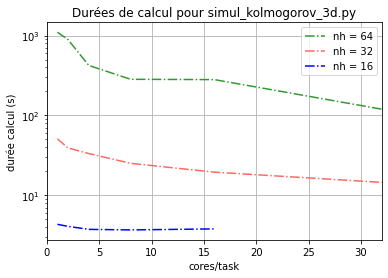

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

    # plotting all data sets.
ax.plot(coresa, times64, linestyle='dashdot', color=Kolor[0], label='nh = 64', lw=1.5)
ax.plot(coresa, times32, linestyle='dashdot', color=Kolor[1], label='nh = 32', lw=1.5)
ax.plot(coresb, times16, linestyle='dashdot', color=Kolor[2], label= 'nh = 16', lw=1.5)
    # Defining limits of the graph, window, grid, scales, and other superficial things.
    # font = font_manager.FontProperties(family= 'Helvetica',
    # style='normal', size=8)  This line does not work yet.
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_xlabel('cores/task')
ax.set_ylabel('durée calcul (s)')
ax.set_xlim(0, 32)
ax.grid()
    # Here you can choose a font too when line 304 works.
ax.legend(loc="best")
ax.set_title('Durées de calcul pour simul_kolmogorov_3d.py')

    # Display of finished graph and chosen points.
    #fig.tight_layout()
plt.show()
    

Ensuite, pour le cas particulier de nh = 16 :

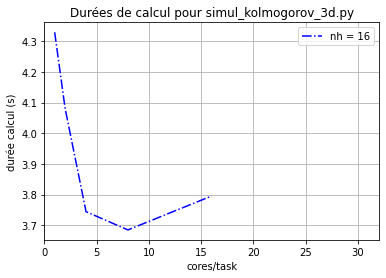

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

    # plotting all data sets.
#ax.plot(coresa, times64, linestyle='dashdot', color=Kolor[0], label='nh = 64', lw=1.5)
#ax.plot(coresa, times32, linestyle='dashdot', color=Kolor[1], label='nh = 32', lw=1.5)
ax.plot(coresb, times16, linestyle='dashdot', color=Kolor[2], label= 'nh = 16', lw=1.5)
    # Defining limits of the graph, window, grid, scales, and other superficial things.
    # font = font_manager.FontProperties(family= 'Helvetica',
    # style='normal', size=8)  This line does not work yet.
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_xlabel('cores/task')
ax.set_ylabel('durée calcul (s)')
ax.set_xlim(0, 32)
ax.grid()
    # Here you can choose a font too when line 304 works.
ax.legend(loc="best")
ax.set_title('Durées de calcul pour simul_kolmogorov_3d.py')

    # Display of finished graph and chosen points.
    #fig.tight_layout()
plt.show()
    

We observe a dip for 8 cores per tasks, and efficiency gets worse for higher values (since duration of calculations increases "unexpectedly"). There is an explanation for this behavior. We use MPI which is a message passing interface that is used for distributed memory management in supercomputers. This management of communication between cores adds some time to treatment. For 16 cores dealing with a $16^3$ grid, it means each cores delivers a calculation for each "cube" of our 3D grid. This might mean that recombination of results by MPI takes a little more time then when there is 2 $1/16^3$ cubes per core -like in the 8 cores/tasks case-. The calculations for $16^3$ grid are so fast compared to the rest it may have allowed us to witness the impact of MPI on calculation on the efficiency of job completion. 

If we are wrong about this explanation, other HPC effects such as Bottleneck may be causing this. 

## Exo 3 - DNS - Turbulent and laminar cases 

#### First simulation - $\nu = 0.1$ $m^2/s$


- Set-up of this simulation :
Our program contains different lines which initiate the simulation with a certain forcing, at a certain scale $L$. Fluidsim contains pre-set forcing types, one of which we use. Its name is `kolmogorov flow` which corresponds homogeneous and isotropic forcing. The lines `params.oper.Lx = params.oper.Ly = Lh = 2.0 * pi` and `params.oper.Lz = Lh * params.oper.nz / params.oper.nx` correspond to the box size we choose for our spectral approach. Here it is taken to be $2\pi$ which is to say $k_{max} \approx 1/2$. We also choose the amplitude for the forcing, here is chosen as 1.0, and the frequency at which we force the flow (which is equivalent to defining the integral length scale $L$). We can define an injection rate, initialized with `injection_rate = (F * L) ** (3 / 2) / L` line. Where `L`=$L$. This injection rate is closely related to $\varepsilon$ the dissipation rate. They tend to become one and the same as time goes on. We choose the value of viscosity to be $0.1 \ m^2/s$ here. 

- Results analysis : 

In [2]:
import os
from fluidsim.solvers.ns2d.solver import Simul
from fluidsim import load_state_phys_file

*************************************
Program fluidsim
Load state from file:
[...]s3d_kolmo_64x64x64_V2pix2pix2pi_2022-12-31_12-39-57/state_phys_t0040.006.h5
sim:                <class 'fluidsim_core.extend_simul.extend_simul_class.<locals>.NewSimul'>
sim.output:         <class 'fluidsim.solvers.ns3d.output.Output'>
sim.oper:           <class 'fluidsim.operators.operators3d.OperatorsPseudoSpectral3D'>
sim.state:          <class 'fluidsim.solvers.ns3d.state.StateNS3D'>
sim.time_stepping:  <class 'fluidsim.solvers.ns3d.time_stepping.TimeSteppingPseudoSpectralNS3D'>
sim.init_fields:    <class 'fluidsim.solvers.ns3d.init_fields.InitFieldsNS3D'>
sim.forcing:        <class 'fluidsim.solvers.ns3d.forcing.ForcingNS3D'>

solver ns3d, RK4 and sequential,
type fft: fluidfft.fft3d.with_pyfftw
nx =     64 ; ny =     64 ; nz =     64
Lx = 2pi ; Ly = 2pi ; Lz = 2pi
path_run =
/home/clement/Sim_data/../Bureau/Physique/Travail_Maison/M2_TMA/NMT/Balarac/Exo3_1/ns3d_kolmo_64x64x64_V2pix2pix2pi_2022-12-31

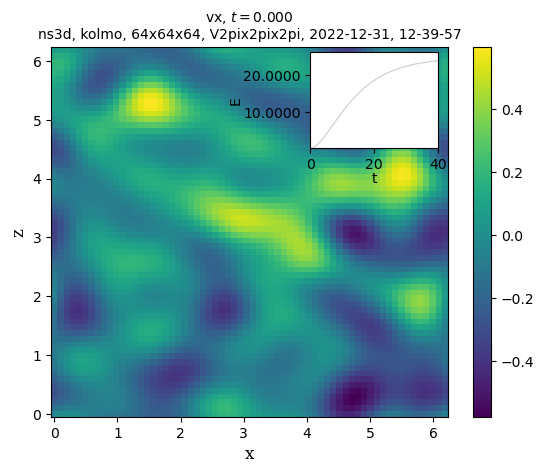

In [17]:
path_to_res = '../Bureau/Physique/Travail_Maison/M2_TMA/NMT/Balarac/Exo3_1/ns3d_kolmo_64x64x64_V2pix2pix2pi_2022-12-31_12-39-57'
sim = load_state_phys_file(path_to_res)
sim.output.phys_fields.set_equation_crosssection("y=0")
sim.output.phys_fields.animate('vx', dt_frame_in_sec=0.5, dt_equations=1.0, tmin=0.0, tmax=0.0, interactive=True)

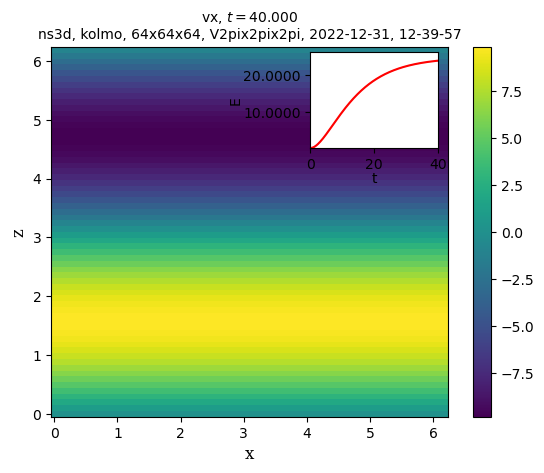

In [18]:
sim.output.phys_fields.set_equation_crosssection("y=0")
sim.output.phys_fields.animate('vx', dt_frame_in_sec=0.5, dt_equations=1.0, tmin=40.0, tmax=40.0, interactive=True)

#### First reation :
As expected the high viscosity makes laminar flow emerge from the initial "noise" field.  

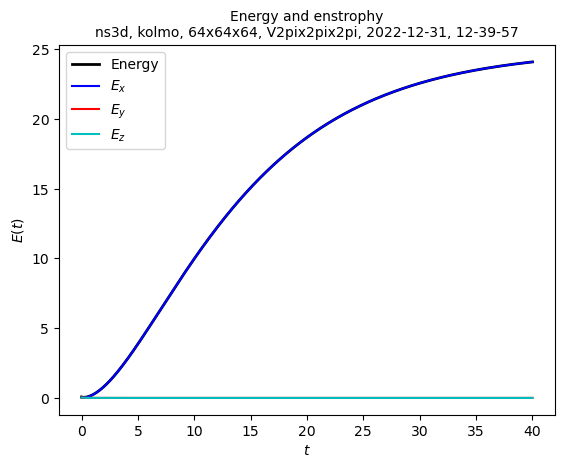

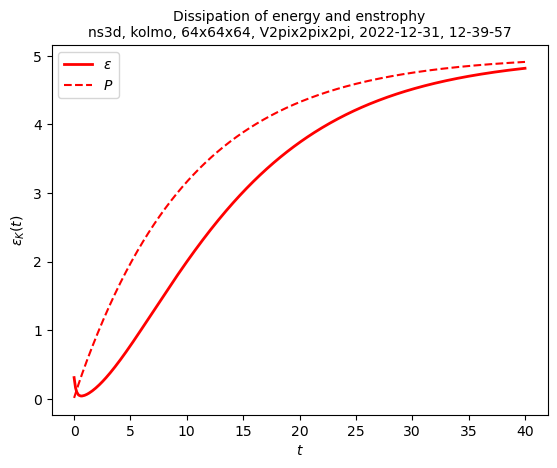

In [6]:
sim.output.spatial_means.plot()

#### Comments on Energy and Enstrophy plots.
Since there is no turbulent dissipation, energy increases as time goes on, until it seems to converge to a stable value. Identicaly for enstrophy.

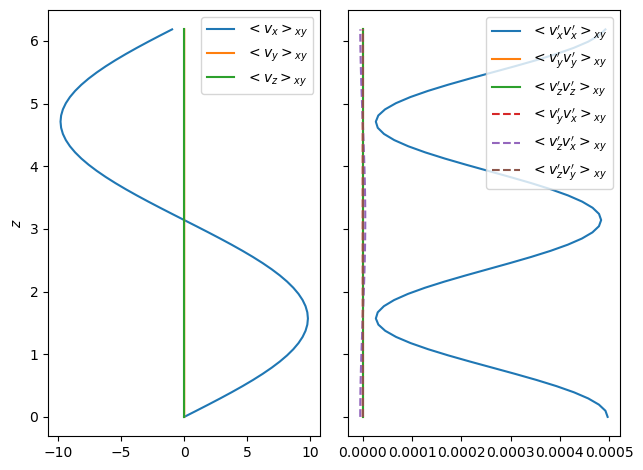

In [7]:
sim.output.horiz_means.plot(tmin=40, tmax=40)

#### Reynolds decomposition analysis.

Here we see only the horizontal speed along the x axis is affected in our simulation, without any emergence of turbulent fluctuations of kinetic energy y-wise or z-wise. All energy is contained in the mean flow, as a very good approximation due to the very small values of $<v_x' v_x' >$. We still observe that the shear caused by the asimetric flow directions makes for sinusoidal turbulent energy fluctuation along the x component of velocity $v$ but, their relative insignificance on flow structure is manifest. 

#### Second simulation - $\nu = 0.0105 $

- Set-up : The only change from previous case is that we decrease viscosity of our flow by a factor of 10.  

*************************************
Program fluidsim
Load state from file:
[...]s3d_kolmo_64x64x64_V2pix2pix2pi_2022-12-31_15-10-03/state_phys_t0040.006.h5
sim:                <class 'fluidsim_core.extend_simul.extend_simul_class.<locals>.NewSimul'>
sim.output:         <class 'fluidsim.solvers.ns3d.output.Output'>
sim.oper:           <class 'fluidsim.operators.operators3d.OperatorsPseudoSpectral3D'>
sim.state:          <class 'fluidsim.solvers.ns3d.state.StateNS3D'>
sim.time_stepping:  <class 'fluidsim.solvers.ns3d.time_stepping.TimeSteppingPseudoSpectralNS3D'>
sim.init_fields:    <class 'fluidsim.solvers.ns3d.init_fields.InitFieldsNS3D'>
sim.forcing:        <class 'fluidsim.solvers.ns3d.forcing.ForcingNS3D'>

solver ns3d, RK4 and sequential,
type fft: fluidfft.fft3d.with_pyfftw
nx =     64 ; ny =     64 ; nz =     64
Lx = 2pi ; Ly = 2pi ; Lz = 2pi
path_run =
/home/clement/Sim_data/../Bureau/Physique/Travail_Maison/M2_TMA/NMT/Balarac/Exo3_0105/ns3d_kolmo_64x64x64_V2pix2pix2pi_2022-12

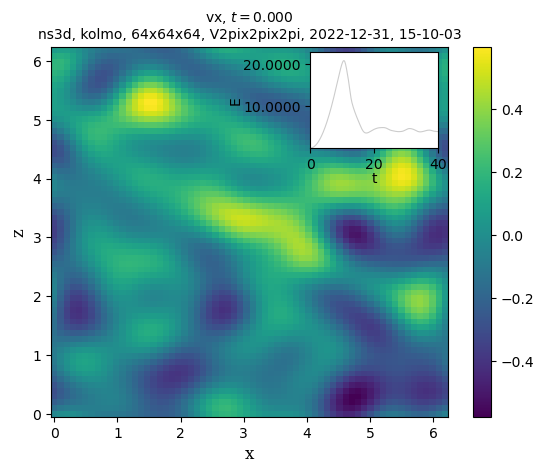

In [3]:
path_to_res = '../Bureau/Physique/Travail_Maison/M2_TMA/NMT/Balarac/Exo3_0105/ns3d_kolmo_64x64x64_V2pix2pix2pi_2022-12-31_15-10-03'
sim = load_state_phys_file(path_to_res)
sim.output.phys_fields.set_equation_crosssection("y=0")
sim.output.phys_fields.animate('vx', dt_frame_in_sec=0.5, dt_equations=1.0, tmin=0.0, tmax=0.0, interactive=True)

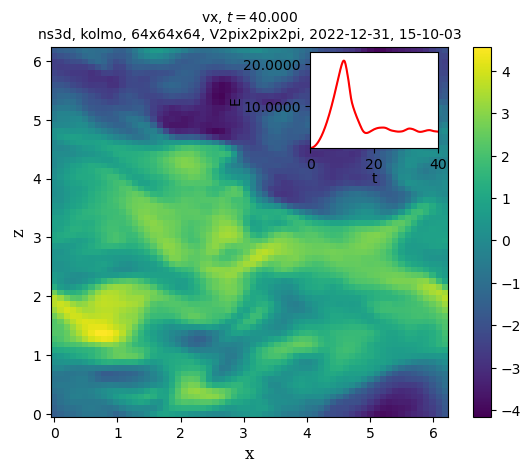

In [15]:
sim.output.phys_fields.set_equation_crosssection("y=0")
sim.output.phys_fields.animate('vx', dt_frame_in_sec=0.5, dt_equations=1.0, tmin=40.0, tmax=40.0, interactive=True)

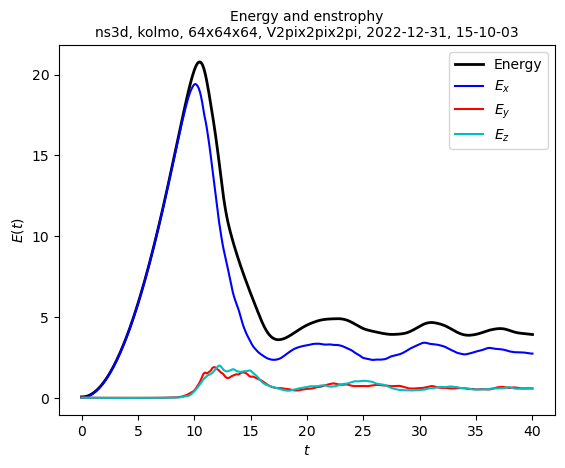

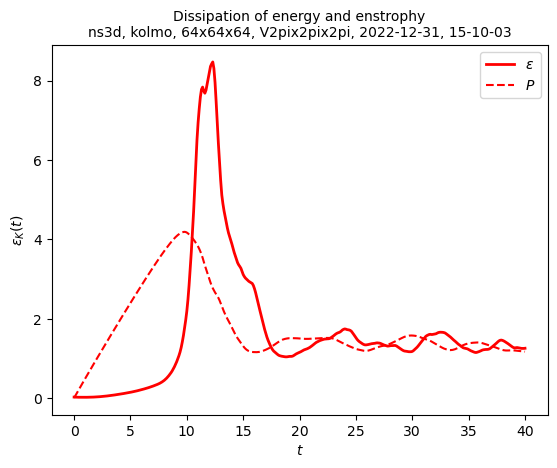

In [10]:
sim.output.spatial_means.plot()

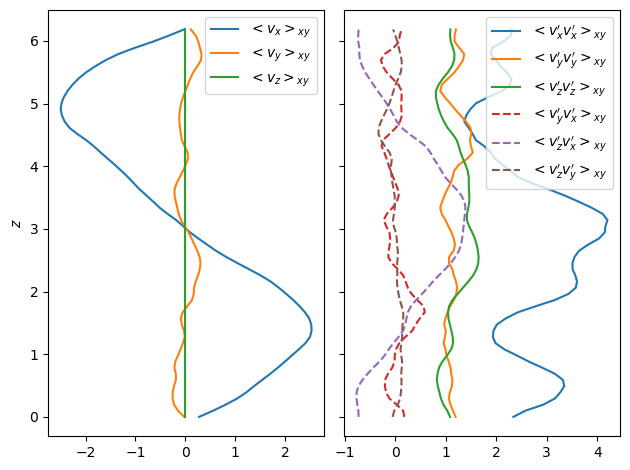

In [11]:
sim.output.horiz_means.plot(tmin=40, tmax=40)

#### Comparison between the two simulations : 
- Energy and Enstrophy : 
    - Both graphics for energy and enstrophy show a peak at around t=10 of the sim, then a stabilization around a single value for each. It is connected to the turbulent dissipation at $\eta$ scales, which counters forcing and is more intense in the second simulation than in the first simulation (where this physical phenomenom mostly did not intervene). 


- Flow structure : 
    At the end of the simulation, the flow appears to have multi-scale turbulent structure. It also looks more complex.

- Velocity and Reynolds analysis : 
    In the second simulation, shear is still present for the x-wise flow, but irregular speed gradients along the y direction seem to have emerged. They are due to the presence of eddies. It is much more evident when looking at the second graph to the right, showing all components $<v_i' v_i'>$ to be way more intense than in simulation one. This means there is energy being stored in the velocity fluctuations (eddies, or other turbulent structures) in all three direction ($i=x,y,z$)  

## Exo 4 - Mesh requirement 

We want to show two arguments which, based on a publication by Sarris & al. and numerical experiments of our own that our simulation can be categorized as DNS. Which is to say : we want to show we simulation all scales from $L$ down to $\eta$ the kolmogorov length scale.

We first remind that with the definition of $\eta$ in the K41 theory, we have a direct relationship between the Reynolds number and both those length scales : 

$$ \frac{L}{\eta} = (Re)^{\frac{3}{4}}$$

We remind that the situation of our simulation is identical to Sarris & al. simulations described in the "Direct Numerical Simulations" part of their paper, which means as we saw that our reynolds number can be expressed as : 

$$ Re = \frac{A^{1/2}}{k^{3/2}_f \nu}$$



Where $A=1.0$ , $k_f = 1.0$, as we saw in our set-up. We know that $L_f =2 \pi$. We can compute $\eta$ and link it with the spectra obtained from our simulation. This will give us a first argument. A second argument is that in their study, Sarris & al. used $128 \times 128 \times 128 $ and   $256 \times 256 \times 256 $ grids to ensure resolution of all scales, but our  $64 \times 64 \times 64$ are very close to what is obtained with  $128 \times 128 \times 128 $. 

#### Spectra and kolmogorov length scale :

Our kolmogorov length scale is thus : $$ \eta = 2\pi \times \nu^{3/4} = 0.206 $$

plot3d(tmin=      40, tmax=      40, coef_compensate=0.000)
plot 3D spectra
tmin =        0 ; tmax =        0
imin =        0 ; imax =        0


<AxesSubplot:title={'center':'3D spectra (tmin=40, tmax=40)\nns3d, kolmo, 64x64x64, V2pix2pix2pi, 2022-12-31, 15-10-03'}, xlabel='$k$', ylabel='spectra'>

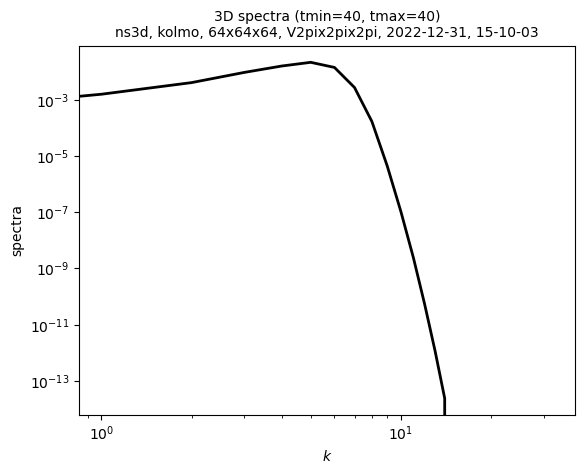

In [7]:
sim.output.spectra.plot3d(tmin=40, tmax=40)

## Exo 5 - Transfer between mean and turbulent field

We use the Reynolds decomposition : 

$$ u_i = <u_i> + u_i'$$

 with all $u$ depending of $t$ and $\vec{x}$, and most importantly $<u_i'>=0$. The average kinetic energy can be defined as : 

 $$ <E> = \frac{1}{2} < u_i u_i > $$ 

Which thus, when using Reynolds' decomposition gives us : 

$$ <E> = \frac{1}{2} < (<u_i>+u_i')(<u_i>+u_i')> = \frac{1}{2} <[<u_i><u_i> + 2 u_i'<u_i> + u_i' u_i']> $$

Since $<u_i'>=0$, we get : 

$$ <E> = \frac{1}{2}<u_i><u_i> + \frac{1}{2} <u_i' u_i'> = K + TKE


#### Expression of TKE and turbulent transfer : 

Transfer equations can be written for both K and TKE, and they show both presence of diffusion and dissipation one transfer/coupling term which is expressed as : 

$$ \pm <u_i' u_i'> \frac{\partial <u_i'>}{\partial x} 
$$ 

This coupling means that there is energy going from the mean flow to the turbulent fluctuations, which is then dissipated as Kolmogorov scales. This energy transfer is dominant when the flow is very turbulent, due to $u_i'$ 

## Exo 6 - Link with K41

In Kolmogorov's 1941 theory can be derived the famous energy density spectra, depending on the energy dissipation rate $\varepsilon$ and spatial frequency $k$ and a constant (of value around 1): 
$$ E(k) = C_{\varepsilon} \varepsilon^{2/3} k^{-5/3}

This result can be obtained by use of a statistical description of the turbulent flow, which is saying, the use of Reynolds' decomposition and tools of statistical analysis, and describes stationnary homogeneous turbulence. Kolmogorov assumed that all the injected energy was dissipated via viscous term in Navier-Stokes equations $<\varepsilon> = < \nu \Delta u_i>$. The main mecanism that allows this transfer is that mean flow kinetic energy can be exchanged towards the fluctuations, thus alimenting the cascade towards the kolmogorov scales. 

## Exo 7 - Scale repartition in turbulence

We now study two more turbulent flow simulations we've done. In two different cases.

### Simulation n°3 - $\nu = 0.0028$ :  

*************************************
Program fluidsim
Load state from file:
[...]3d_kolmo_64x64x64_V2pix2pix2pi_2022-12-31_16-27-40/state_phys_t00100.002.h5
sim:                <class 'fluidsim_core.extend_simul.extend_simul_class.<locals>.NewSimul'>
sim.output:         <class 'fluidsim.solvers.ns3d.output.Output'>
sim.oper:           <class 'fluidsim.operators.operators3d.OperatorsPseudoSpectral3D'>
sim.state:          <class 'fluidsim.solvers.ns3d.state.StateNS3D'>
sim.time_stepping:  <class 'fluidsim.solvers.ns3d.time_stepping.TimeSteppingPseudoSpectralNS3D'>
sim.init_fields:    <class 'fluidsim.solvers.ns3d.init_fields.InitFieldsNS3D'>
sim.forcing:        <class 'fluidsim.solvers.ns3d.forcing.ForcingNS3D'>

solver ns3d, RK4 and sequential,
type fft: fluidfft.fft3d.with_pyfftw
nx =     64 ; ny =     64 ; nz =     64
Lx = 2pi ; Ly = 2pi ; Lz = 2pi
path_run =
/home/clement/Sim_data/../Bureau/Physique/Travail_Maison/M2_TMA/NMT/Balarac/Exo6_28/ns3d_kolmo_64x64x64_V2pix2pix2pi_2022-12-3

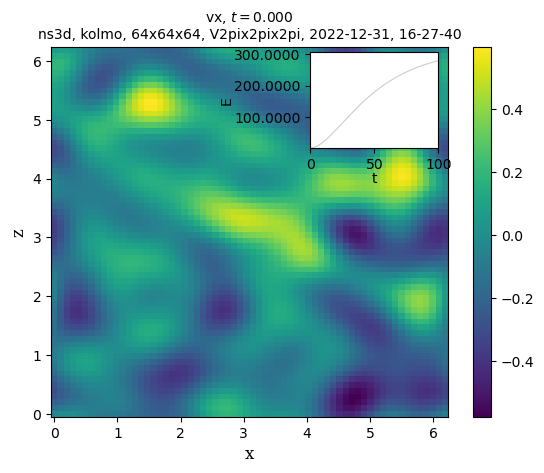

In [4]:
path_to_res = '../Bureau/Physique/Travail_Maison/M2_TMA/NMT/Balarac/Exo6_28/ns3d_kolmo_64x64x64_V2pix2pix2pi_2022-12-31_16-27-40'
sim = load_state_phys_file(path_to_res)
sim.output.phys_fields.set_equation_crosssection("y=0")
sim.output.phys_fields.animate('vx', dt_frame_in_sec=0.5, dt_equations=4.0, tmin=0.0, tmax=0.0, interactive=True)

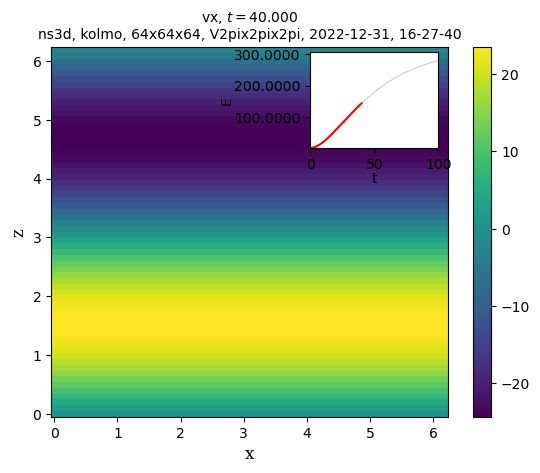

In [6]:
sim.output.phys_fields.set_equation_crosssection("y=0")
sim.output.phys_fields.animate('vx', dt_frame_in_sec=0.5, dt_equations=4.0, tmin=40.0, tmax=40.0, interactive=True)

### Simulation n°4 - $\nu = 0.001$ :

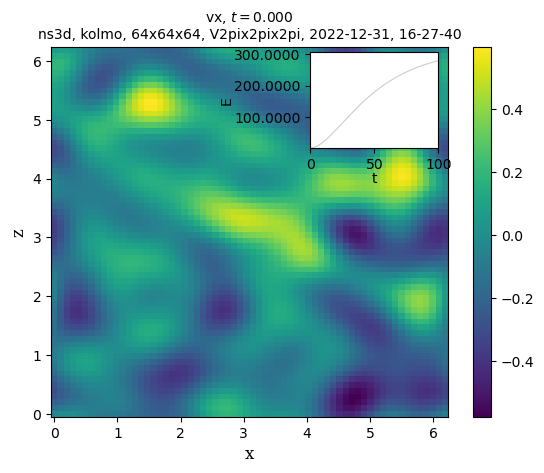

In [9]:
path_to_res = '../Bureau/Physique/Travail_Maison/M2_TMA/NMT/Balarac/Exo6_01/ns3d_kolmo_64x64x64_V2pix2pix2pi_2022-12-31_16-34-30'
sim.output.phys_fields.set_equation_crosssection("y=0")
sim.output.phys_fields.animate('vx', dt_frame_in_sec=0.5, dt_equations=4.0, tmin=0.0, tmax=0.0, interactive=True)

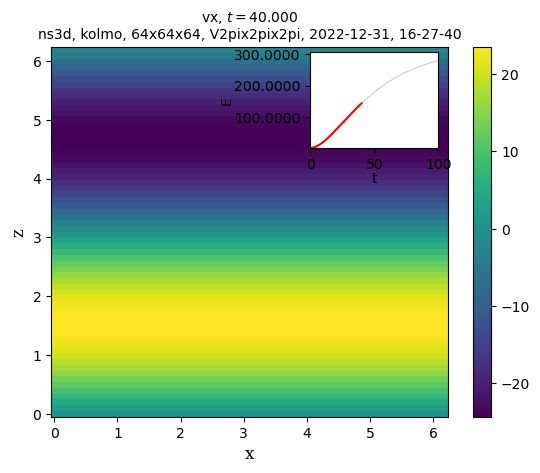

In [10]:
sim.output.phys_fields.set_equation_crosssection("y=0")
sim.output.phys_fields.animate('vx', dt_frame_in_sec=0.5, dt_equations=4.0, tmin=40.0, tmax=40.0, interactive=True)

There is a problem it seems, the data we are using is not the right one because it does not correspond to the turbulent situation. A manipulation mistake has probably occured during our use of `scp ...̀` this problem will be fixed in the next version of our report.
   

## Exo 8 - $LES$

Questions :

- For numerical prediction of turbulent flows, what is the difference between DNS, RANS and LES?

    - DNS means "Direct Numerical Simulation", it is an approach which consists in solving "purely" the Navier-Stokes equations at all scales, even viscous kolmogorov scales. It implies no (or very little) assumptions. It is the most costly method, and therefore limited in terms of maximum $Re \approx 5000$ in 3 dimensions, without complex geometry.

    - RANS means "Reynolds-Averaged Navier-Stokes", it is an approach which consists in solving the version of Navier-Stokes equations to which has been applied the Reynolds decomposition $u(x,t) = <u(x,t)> + u'(x,t)$, most particularly resolve for the nonlinear Reynolds stress by using a specific model (Sparlart-Allmaras, $k-\varepsilon$, $k-\omega$) which are chosen depending on the problem. It can reach high values of $Re$ compared to DNS. It is still widely used in industrial engineering cycles due to its good balance between cost reduction, speed and quality to simulate objects with complex geometry.

    - LES means "Large Eddy Simulation", it consists in solving Navier-Stokes equations but not all the way to viscous scales. There is a cut-off during the inertial range, where scales are no longer being calculated but instead a chosen model prolongs the results at smallest scales. This reduces costs greatly with comparable results to RANS, with very often simpler implementation.  
    #


- What is the main idea of LES? Why is relevant?

    - As said previously, the main idea introduced by Smagorinsky is to filter the Navier-Stokes equation to consider only scales where viscosity play a small role, and use high-order numerical schemes (or a very fine grid) to solve the filtered equations. Then, a model is used to obtain results at smallest scales (as they are still relevant). The approach is relevant because of important calculation cost reduction for CFD applications, whilst maintaining good accuracy. 
    #

- What is the equations to solve to perform LES?

    - The equations depend on wether we consider a compressible flow, or an incompressible flow. But, for an incompressible flow here, we solve the filtered Navier-Stokes equations, the LES equations : 

    $$ \partial_t \overline{u_i} + \overline{u_j} \partial_j(\overline{u_i} ) = - \frac{1}{\rho} \partial_i \overline{p} + \nu \partial_j \partial_j \overline{u_{i}} - \partial_i \tau_{ij} $$

    where $x$ is usual object, and $\overline{x}$ is a filtered variable, and $\tau_{ij} = \overline{u_i u_j} - \bar{u_i} \bar{u_j}$ is the stress tensor.
    #

- What is the role of the SGS tensor for the energetic point of view?

    - The role of the "Sub-Grid Scale" tensor $\tau^{SGS}_{ij}$ is to provide a modelisation for energy dissipation at small scales, which are not solved directly. It replaces the stres-tensor in the LES equations.
    #


- For modeling of the SGS tensor, what is the functional approach? what is the structural approach?

    - The functionnal approach is to model $\tau_{ij}$ is to introduce an artificial "eddy viscosity" $\nu_t$ (or "turbulent viscosity") and energy dissipation is taken to be of the same value as molecular energy dissipation, and the expression for the tensor is generaly : 

    $$ \tau^r_{ij} - \frac{1}{3} \tau_{kk} \delta_{ij} = - 2 \nu_t \overline{S_{ij}}$$

    - The structural approach is to use a second filter called "test-filter" noted $\widehat{u}$ as well as the first "main" filter noted $\overline{u}$. For exemple, the quantity $L_{ij} =  \widehat{\overline{u_i}} \widehat{\overline{u_j}} - \widehat{\overline{u_i}\overline{u_j}}$ can be used instead of $\tau_{ij}$. 

- What is the Smagorinsky model (functional approach)?

    - The Smagorinsky-Lilly model takes the particular approach of a functionnal approach with : 
    $$ \tau_{ij} - \frac{1}{3} \tau_{kk} \delta_{ij} = - 2 (C_s \Delta )^2 |\overline{S}| S_{ij}$$

    where $(C_s \Delta )^2 |\overline{S}| = \nu_t $ is the eddy viscosity, $\Delta= (Volume)^{1/3}$ is usually taken. For the Smagorinsky model, $C_s \approx 0.1$, $0.2$

- What is the dynamic procedure used to overcome limitation of the Smagorinsky model?

    - A localized dynamic model can introduce the subgrid scale kinetic energy :
    $$ k_{sgs} = \frac{1}{2} (\overline{u_k^2} - \overline{u_k}^2) $$ 
    
    and then express the model's subgrid scale stress as : 
    $$ \tau_{ij} - \frac{2}{3} k_{sgs} \delta_{ij} = - 2 C_k k_{sgs}^{1/2} \overline{S_{ij}} $$

    This allows to model the energy beyond the grid limitations for the Smagorinsky model.


## Exo 9 & 10 - $LES$ Practice 

### Differences between old script and LES script :

We observe, in the new LES script the presence of new lines of code : 
- `from fluidsim_my_models import SmagorinskyModel`
- ` Simul = extend_simul_class( SimulNotExtended, [KolmogorovFlow, KolmogorovFlowNormalized, SmagorinskyMod$)` This line existed, but was modified to include the Smagorinsky model.
-   `params.turb_model.enable = True` 
and 
    `params.turb_model.type = "smagorinsky"` 
This is to tell the simulation to use the smagorinsky model which was introduced and "instantiated" by the previous lines.



We then modify two lines inside of the script `fluidsim_my_models` which is where the Smagorinsky Model equations are calculated. We do so because otherwise, it is incomplete. we add : 

`C_nu_T = 1.0` 
and 
`nu_T = 0.18*6.28` (because $Volume=2\pi$ and $C_s=0.18$)

We then perform the simulation with $\nu_3 = 0.001$ and $64^3$ grid.
